# 과제

### Problem 1

scikit-learn을 활용해 다음의 비선형-SVM 문제를 풀려고 합니다. 다음의 단계를 따라 완성해보세요.

1. numpy를 활용해 비선형 데이터를 만들어보세요.

- 랜덤으로 생성된 X_xor에서 양수인 데이터를 1차적으로 필터링해 y_xor에 지정해보세요.(exclusive or 조건을 활용할 것)
- X_xor와 y_xor 데이터의 구조를 토대로 scatterplot을 그려보세요

참고로 exclusive or(XOR)의 논리 진리표는 다음과 같습니다.

|  | Y=0 | Y=1 |
| -- | -- | -- |
| X=0 | 0 | 1 |
| X=1 | 1 | 0 |

In [ ]:
x=np.random.randn(10,2)

y=np.where(x>0,x)

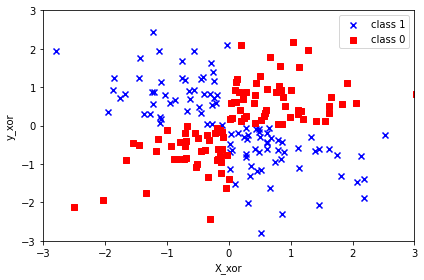

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Create non-linear dataset
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.where((X_xor[:,0]>0)^(X_xor[:,1]>0), 1,0)


# Visualization of class 1
plt.scatter(X_xor[y_xor==1,0],X_xor[y_xor==1,1] ,
            c='b', marker='x', label='class 1')

# Visualization of class 0
plt.scatter(X_xor[y_xor==0,0],X_xor[y_xor==0,1]  ,
            c='r', marker='s', label='class 0')

plt.xlabel('X_xor')
plt.ylabel('y_xor')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

2. 데이터와 결정경계를 그려주는 함수 `plot_decision_regions`를 만들어보세요.

- `Z` 변수에 `plot_decision_regions`의 인자 중에서, 모델을 `predict`할 수 있는 인자를 받아서 지정합니다.
- `predict`할 때 X와 Y 변수는 함수에서 각각 `xx1.ravel()`, `xx2.ravel()`이며, 전체 array에 Transpose를 취해주세요.

In [53]:
# define function about visualizing decision_regions
def plot_decision_regions(X, y, classifier, resolution = 0.02):
    
    # set marker and colormap
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # set a decision boundary
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    print(xx1.shape, 362*392)
    # predicted value of classifier(model)
    Z = classifier.predict(np.concatenate((xx1.reshape(-1,1),xx2.reshape(-1,1)),axis=1))
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot a decision boundary
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(X[y == cl, 0], X[y == cl, 1],
                   alpha = 0.8, c = colors[idx], marker = markers[idx], label = cl, edgecolor = 'black')

3. 위에서 만든 비선형 데이터와 `plot_decision_regions`를 활용해 비선형-SVM 모델을 학습하고 그래프를 그려보세요.

- SVM 모델에서 비선형-SVM을 모델을 만들기 위한 `kernel`을 설정해보세요.
- 개별 데이터와 결정 경계와의 거리를 정하는 변수(influence of a single training point reaches)는 0.1로, smooth한 그래프를 그려주는 변수는 10으로 지정해보세요.
- SVM 모델을 학습하고 `plot_decision_regions`를 활용해 학습 결과를 그래프로 그려보세요. (위에서 `plot_decision_regions`의 인자를 잘 살펴보세요.)

(362, 392) 141904


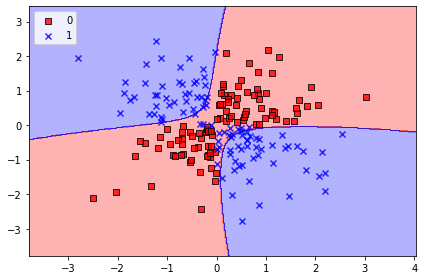

In [57]:
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

# Make model of non-linear svm model
svm = SVC(kernel='rbf', C=10.0, gamma=0.1)

# Fitting model with data
svm.fit(X_xor,y_xor)

# Use `plot_decision_regions` for visualizing decision result
plot_decision_regions(X_xor,y_xor,svm)

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Problem 2

KMeans의 알고리즘 과정을 그래프로 도식화해서 확인해보려고 합니다. 다음의 단계를 따라 완성해보세요.

1. scikit-learn을 활용해 모든 방향으로 같은 성질의 정규분포(등방성 가우시안 정규분포)를 가지는 가상 데이터를 생성해보세요.

- 샘플(`n_samples`)의 개수를 90개로 지정해보세요.
- 클러스터 중심/센트로이드(`center`)를 3개로 지정해보세요.

In [106]:
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=90, n_features=2, centers=3)

2. scikit-learn와, matplotlib을 활용해 KMeans 알고리즘 과정에서의 각각의 iteration 나타내는 그래프를 그리는 함수를 만들어보세요.

- `plot_KMeans` 함수는 n(cluster의 개수)만은 인자로 받는 함수입니다.
- model에 KMeans 모델을 만들어보세요.
    - cluster의 중심을 3개로 만들어보세요. 
    - 초기화 방법을 "random"로 지정하세요.
    - 각 그래프마다 iteration 수가 1씩 증가해야하므로, 초기 중심위치 시도 횟수는 1로, 최대 반복 횟수를 n으로 지정해보세요.
    - X 데이터를 학습시켜 보세요.
- cluster의 중심을 각각 c0, c1, c2에 지정하세요.
- X 데이터를 scatter plot으로 그려보세요. (색깔은 label의 종류별로 다르게 지정해보세요.)
- cluster의 중심을 scatter plot으로 그려보세요. (`marker`는 `^`로, 사이즈는 200으로 지정해보세요.)

In [107]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

c_group={0:'r', 1:'b', 2:'g'}

def plot_KMeans(n):
    model = KMeans(n_clusters=3, n_init=1, max_iter=n, random_state=42) # make and fit KMeans model
    y_pred = model.fit_predict(X)
    c0, c1, c2 = model.cluster_centers_
    for i in np.unique(y_pred):
      plt.scatter(X[y_pred==i,0], X[y_pred==i,1], c=c_group[i] ) # make scatterplot of X
    plt.scatter( [c0[0],c1[0],c2[0]] ,[c0[1],c1[1],c2[1]] , marker='^' , s=200 ) # make scatterplot of cluster centers
    
    plt.grid(False)
    plt.title("iteration={}, inertia={:5.2f}".format(n, -model.score(X)))

3. 위에서 만든 `plot_KMeans`함수를 가지고 KMeans iteration이 1부터 4일때, 각각의 경우를 subplot에 그려보세요.

- (for 문을 활용해) col과 row가 2인 2x2 subplot을 만들어보세요.
- `plot_KMeans`를 활용해 KMeans iteration이 1부터 4까지 순서대로 subplot 위치에 그려보세요.

(+ 참고 : 그래프를 다 완성하고 나서, iteration이 더 큰데 불구하고 inertia가 더 큰 경우가 있습니다. 현재 위의 코드는 모델에서 한 번 학습할 때, KMeans 알고리즘의 반복 횟수대로 그린게 아니기 때문입니다. 즉, iteration=1일 때, KMeans 알고리즘을 한 번만 반복하고 끝내고, iteration=2일 때, 다시 처음부터 알고리즘이 시작하기 때문입니다.)

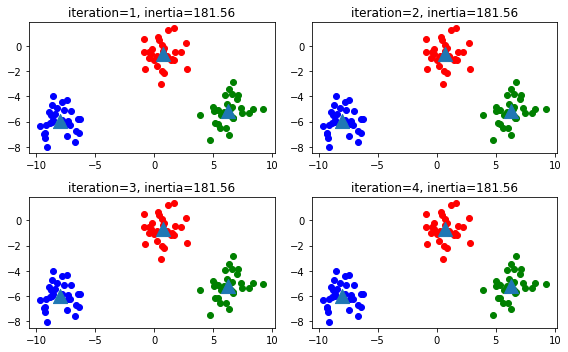

In [105]:
plt.figure(figsize=(8, 5))

plt.subplot(2, 2, 1) 
plot_KMeans(1)

plt.subplot(2,2,2)
plot_KMeans(2)

plt.subplot(2,2,3)
plot_KMeans(3)

plt.subplot(2,2,4)
plot_KMeans(4)

plt.tight_layout()
plt.show()